## 3IPD Strategy Evolution

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(""), os.pardir)))

In [15]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from эipdai import IPDGame, Actions
from эipdai.strategies import *
from эipdai.tournament import *

In [3]:
representatives = [
    Naive(),
    Defector(),
    Random(),
    SoftT4T(),
    ToughT4T(),
    FairT4T(),
    DecayingT4T(),
    GradualT4T(),
    SoftT42T(),
    ToughT42T(),
    AnotherT42T(),
    SoftGrudger(),
    ToughGrudger(),
    Grofman(),
    Joss(),
    Davis(),
    AverageCopier(),
    Proposer(),
    Stalker(),
    BetterAndBetter(),
    Shubik(),
    SoftTullock(),
    ToughTullock()
]

In [4]:
environment = IPDGame(min_rounds=100, max_rounds=100)

In [5]:
def get_fitness_func(environment, representatives, memory_len):
    def fitness_func(ga_instance, solution, solution_idx):

        solution_agent = GeneticStrategy(memory_len=memory_len, genotype=solution)
        schedule = schedule_games_subset(len(representatives))
        tally = 0

        for roster in schedule:

            round_players = [solution_agent] + [representatives[i] for i in roster]
            for player in round_players:
                player.reset()

            observations, infos = environment.reset()
            rewards = {agent_id: None for agent_id in environment.possible_agents}

            while True:
                actions = {
                    agent_id : round_players[i].play(observations[agent_id], rewards[agent_id]) 
                    for i, agent_id in enumerate(environment.possible_agents)
                }

                observations, rewards, terminations, trunctations, infos = environment.step(actions)

                tally += rewards[environment.possible_agents[0]]

                if any(terminations.values()): break

        return tally / len(schedule)
    
    return fitness_func

In [6]:
def on_generation(ga_instance):
    print(f'Generation: {ga_instance.generations_completed}')
    print(f'Fitness:    {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}')

### Experiment 1
* Memory length: 2
* Generations: 100
* Population size: 200

In [16]:
experiment_1 = pygad.GA(
    num_generations=100,
    initial_population=[GeneticStrategy(memory_len=2).genotype for _ in range(200)],
    fitness_func=get_fitness_func(environment, representatives, memory_len=2),
    num_parents_mating=5,
    parent_selection_type='rank',
    keep_parents=0,
    crossover_type='uniform',
    mutation_probability=0.1,
    gene_space={'low' : Actions.C, 'high' : Actions.D},
    gene_type=int,
    on_generation=on_generation,
    save_solutions=True
)

#### Run 1

In [17]:
experiment_1_run_1 = deepcopy(experiment_1)

In [8]:
experiment_1_run_1.run()

Generation: 1
Fitness:    504.1666666666667
Generation: 2
Fitness:    504.1666666666667
Generation: 3
Fitness:    504.1666666666667
Generation: 4
Fitness:    504.1666666666667
Generation: 5
Fitness:    504.1666666666667
Generation: 6
Fitness:    504.1666666666667
Generation: 7
Fitness:    504.1666666666667
Generation: 8
Fitness:    504.1666666666667
Generation: 9
Fitness:    504.1666666666667
Generation: 10
Fitness:    504.1666666666667
Generation: 11
Fitness:    504.1666666666667
Generation: 12
Fitness:    504.1666666666667
Generation: 13
Fitness:    504.1666666666667
Generation: 14
Fitness:    504.1666666666667
Generation: 15
Fitness:    504.1666666666667
Generation: 16
Fitness:    504.1666666666667
Generation: 17
Fitness:    504.1666666666667
Generation: 18
Fitness:    504.1666666666667
Generation: 19
Fitness:    504.1666666666667
Generation: 20
Fitness:    504.1666666666667
Generation: 21
Fitness:    504.1666666666667
Generation: 22
Fitness:    504.1666666666667
Generation: 23
Fitn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


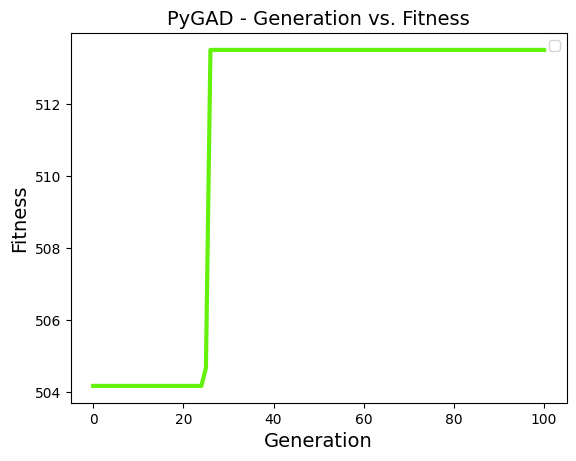

In [9]:
experiment_1_run_1.plot_fitness()
plt.show()

In [10]:
best_solution, best_solution_fitness, best_solution_idx = experiment_1_run_1.best_solution()

In [11]:
evolved_agent = GeneticStrategy(memory_len=2, genotype=best_solution, name='Evolved')

In [12]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 1)
(['010'], 0)
(['011'], 0)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 0)
(['000', '000'], 0)
(['000', '001'], 1)
(['000', '010'], 0)
(['000', '011'], 0)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 0)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 0)
(['001', '100'], 0)
(['001', '101'], 0)
(['001', '110'], 0)
(['001', '111'], 0)
(['010', '000'], 0)
(['010', '001'], 0)
(['010', '010'], 0)
(['010', '011'], 0)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 0)
(['011', '000'], 0)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 1)
(['100', '000'], 0)
(['100', '001'], 0)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 0)
(['101', '000'], 0)
(['101', '001'], 0)
(['101', '010'], 0)
(['101', '011'], 0)
(['

In [13]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'SoftTullock': 435.76166666666666,
 'Grofman': 437.2966666666667,
 'ToughTullock': 439.445,
 'Naive': 439.45916666666665,
 'ToughGrudger': 439.6575,
 'ToughT4T': 440.4,
 'SoftT4T': 440.4683333333333,
 'GradualT4T': 441.1816666666667,
 'BetterAndBetter': 442.1308333333333,
 'SoftGrudger': 442.1591666666667,
 'Stalker': 442.44416666666666,
 'Random': 442.5275,
 'Proposer': 442.5825,
 'Joss': 442.7083333333333,
 'Davis': 443.79583333333335,
 'Shubik': 443.82666666666665,
 'Evolved': 444.12,
 'AverageCopier': 444.15,
 'AnotherT42T': 445.0675,
 'DecayingT4T': 445.3433333333333,
 'Defector': 446.18666666666667,
 'SoftT42T': 446.3308333333333,
 'ToughT42T': 447.4325,
 'FairT4T': 447.87333333333333}

#### Run 2

In [18]:
experiment_1_run_2 = deepcopy(experiment_1)

In [19]:
experiment_1_run_2.run()

Generation: 1
Fitness:    500.5
Generation: 2
Fitness:    505.25
Generation: 3
Fitness:    505.25
Generation: 4
Fitness:    505.25
Generation: 5
Fitness:    505.25
Generation: 6
Fitness:    505.25
Generation: 7
Fitness:    505.25
Generation: 8
Fitness:    505.25
Generation: 9
Fitness:    505.25
Generation: 10
Fitness:    505.25
Generation: 11
Fitness:    505.25
Generation: 12
Fitness:    505.25
Generation: 13
Fitness:    509.5833333333333
Generation: 14
Fitness:    509.5833333333333
Generation: 15
Fitness:    509.5833333333333
Generation: 16
Fitness:    509.5833333333333
Generation: 17
Fitness:    509.5833333333333
Generation: 18
Fitness:    509.5833333333333
Generation: 19
Fitness:    509.5833333333333
Generation: 20
Fitness:    509.5833333333333
Generation: 21
Fitness:    509.5833333333333
Generation: 22
Fitness:    509.5833333333333
Generation: 23
Fitness:    509.5833333333333
Generation: 24
Fitness:    509.5833333333333
Generation: 25
Fitness:    509.5833333333333
Generation: 26
Fi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


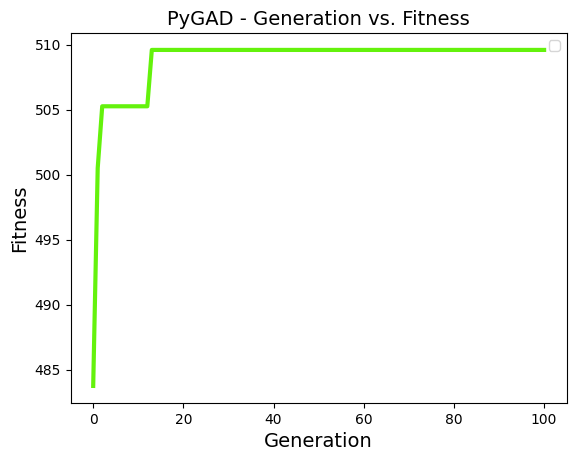

In [26]:
experiment_1_run_2.plot_fitness()
plt.show()

In [34]:
best_solution, best_solution_fitness, best_solution_idx = experiment_1_run_2.best_solution()

In [35]:
evolved_agent = GeneticStrategy(memory_len=2, genotype=best_solution, name='Evolved')

In [36]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 1)
(['010'], 0)
(['011'], 1)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 1)
(['000', '000'], 0)
(['000', '001'], 0)
(['000', '010'], 0)
(['000', '011'], 0)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 0)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 1)
(['001', '100'], 1)
(['001', '101'], 0)
(['001', '110'], 0)
(['001', '111'], 0)
(['010', '000'], 1)
(['010', '001'], 0)
(['010', '010'], 0)
(['010', '011'], 1)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 1)
(['011', '000'], 1)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 1)
(['100', '000'], 0)
(['100', '001'], 1)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 0)
(['101', '000'], 0)
(['101', '001'], 0)
(['101', '010'], 0)
(['101', '011'], 1)
(['

In [22]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'SoftTullock': 435.79083333333335,
 'Joss': 438.07,
 'AnotherT42T': 438.32166666666666,
 'Grofman': 438.3525,
 'ToughGrudger': 440.2608333333333,
 'Proposer': 440.29833333333335,
 'BetterAndBetter': 440.7366666666667,
 'Shubik': 440.83416666666665,
 'Random': 441.37583333333333,
 'Stalker': 441.81916666666666,
 'Defector': 442.26916666666665,
 'SoftT42T': 442.595,
 'Naive': 443.1975,
 'SoftGrudger': 443.7291666666667,
 'ToughT4T': 443.9558333333333,
 'Davis': 443.9658333333333,
 'SoftT4T': 445.1741666666667,
 'Evolved': 445.3066666666667,
 'GradualT4T': 445.80083333333334,
 'AverageCopier': 445.83916666666664,
 'FairT4T': 446.20916666666665,
 'DecayingT4T': 446.6191666666667,
 'ToughTullock': 446.96416666666664,
 'ToughT42T': 448.89166666666665}

### Experiment 2
* Memory length: 3
* Generations: 100
* Population size: 200

In [23]:
experiment_2 = pygad.GA(
    num_generations=100,
    initial_population=[GeneticStrategy(memory_len=3).genotype for _ in range(200)],
    fitness_func=get_fitness_func(environment, representatives, memory_len=3),
    num_parents_mating=5,
    parent_selection_type='rank',
    keep_parents=0,
    crossover_type='uniform',
    mutation_probability=0.1,
    gene_space={'low' : Actions.C, 'high' : Actions.D},
    gene_type=int,
    on_generation=on_generation,
    save_solutions=True
)

#### Run 1

In [24]:
experiment_2_run_1 = deepcopy(experiment_2)

In [25]:
experiment_2_run_1.run()

Generation: 1
Fitness:    506.6666666666667
Generation: 2
Fitness:    506.6666666666667
Generation: 3
Fitness:    506.6666666666667
Generation: 4
Fitness:    506.6666666666667
Generation: 5
Fitness:    506.6666666666667
Generation: 6
Fitness:    506.6666666666667
Generation: 7
Fitness:    506.6666666666667
Generation: 8
Fitness:    506.6666666666667
Generation: 9
Fitness:    506.6666666666667
Generation: 10
Fitness:    506.6666666666667
Generation: 11
Fitness:    506.6666666666667
Generation: 12
Fitness:    506.6666666666667
Generation: 13
Fitness:    506.6666666666667
Generation: 14
Fitness:    506.6666666666667
Generation: 15
Fitness:    506.6666666666667
Generation: 16
Fitness:    510.25
Generation: 17
Fitness:    510.25
Generation: 18
Fitness:    510.25
Generation: 19
Fitness:    510.25
Generation: 20
Fitness:    510.25
Generation: 21
Fitness:    510.25
Generation: 22
Fitness:    516.9166666666666
Generation: 23
Fitness:    516.9166666666666
Generation: 24
Fitness:    516.916666666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


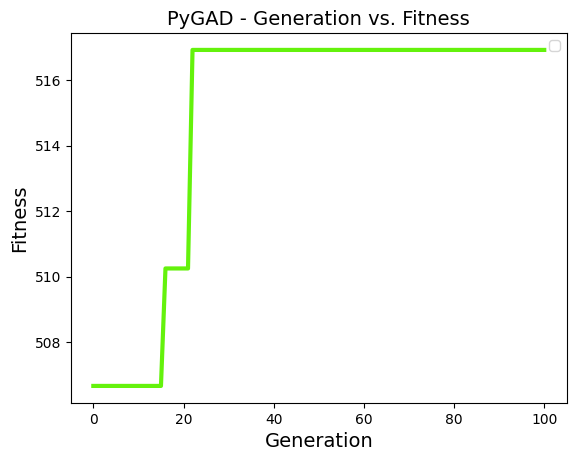

In [27]:
experiment_2_run_1.plot_fitness()
plt.show()

In [28]:
best_solution, best_solution_fitness, best_solution_idx = experiment_2_run_1.best_solution()

In [29]:
evolved_agent = GeneticStrategy(memory_len=3, genotype=best_solution, name='Evolved')

In [31]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 0)
(['010'], 0)
(['011'], 0)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 0)
(['000', '000'], 0)
(['000', '001'], 1)
(['000', '010'], 0)
(['000', '011'], 1)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 0)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 0)
(['001', '100'], 0)
(['001', '101'], 0)
(['001', '110'], 1)
(['001', '111'], 0)
(['010', '000'], 0)
(['010', '001'], 0)
(['010', '010'], 0)
(['010', '011'], 0)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 0)
(['011', '000'], 0)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 0)
(['100', '000'], 0)
(['100', '001'], 0)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 0)
(['101', '000'], 0)
(['101', '001'], 0)
(['101', '010'], 0)
(['101', '011'], 0)
(['

In [30]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'Davis': 436.34833333333336,
 'Defector': 437.735,
 'ToughGrudger': 439.575,
 'DecayingT4T': 440.04083333333335,
 'Grofman': 440.5416666666667,
 'Proposer': 441.3441666666667,
 'AnotherT42T': 441.6191666666667,
 'SoftTullock': 441.6566666666667,
 'ToughT4T': 442.2266666666667,
 'SoftT4T': 442.38166666666666,
 'ToughT42T': 443.1716666666667,
 'Stalker': 443.3025,
 'SoftT42T': 443.65833333333336,
 'Random': 443.86083333333335,
 'SoftGrudger': 444.3175,
 'Evolved': 444.3675,
 'GradualT4T': 444.40416666666664,
 'AverageCopier': 444.73083333333335,
 'Naive': 444.7316666666667,
 'BetterAndBetter': 444.8383333333333,
 'Joss': 445.3225,
 'ToughTullock': 446.0708333333333,
 'Shubik': 447.54583333333335,
 'FairT4T': 447.6933333333333}

#### Run 2

In [32]:
experiment_2_run_2 = deepcopy(experiment_2)

In [33]:
experiment_2_run_2.run()

Generation: 1
Fitness:    470.9166666666667
Generation: 2
Fitness:    491.3333333333333
Generation: 3
Fitness:    491.3333333333333
Generation: 4
Fitness:    491.9166666666667
Generation: 5
Fitness:    491.9166666666667
Generation: 6
Fitness:    502.5
Generation: 7
Fitness:    503.75
Generation: 8
Fitness:    503.75
Generation: 9
Fitness:    514.0
Generation: 10
Fitness:    514.0
Generation: 11
Fitness:    514.0
Generation: 12
Fitness:    514.0
Generation: 13
Fitness:    515.4166666666666
Generation: 14
Fitness:    515.4166666666666
Generation: 15
Fitness:    515.4166666666666
Generation: 16
Fitness:    515.4166666666666
Generation: 17
Fitness:    515.4166666666666
Generation: 18
Fitness:    515.4166666666666
Generation: 19
Fitness:    515.4166666666666
Generation: 20
Fitness:    515.4166666666666
Generation: 21
Fitness:    515.4166666666666
Generation: 22
Fitness:    515.4166666666666
Generation: 23
Fitness:    515.4166666666666
Generation: 24
Fitness:    515.4166666666666
Generation:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


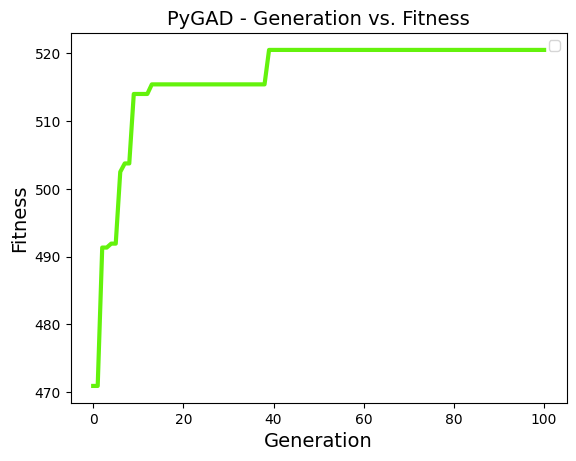

In [37]:
experiment_2_run_2.plot_fitness()
plt.show()

In [38]:
best_solution, best_solution_fitness, best_solution_idx = experiment_2_run_2.best_solution()

In [39]:
evolved_agent = GeneticStrategy(memory_len=3, genotype=best_solution, name='Evolved')

In [40]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 0)
(['010'], 0)
(['011'], 0)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 0)
(['000', '000'], 0)
(['000', '001'], 0)
(['000', '010'], 0)
(['000', '011'], 0)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 0)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 0)
(['001', '100'], 0)
(['001', '101'], 1)
(['001', '110'], 0)
(['001', '111'], 0)
(['010', '000'], 0)
(['010', '001'], 0)
(['010', '010'], 0)
(['010', '011'], 0)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 0)
(['011', '000'], 0)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 0)
(['100', '000'], 0)
(['100', '001'], 0)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 0)
(['101', '000'], 0)
(['101', '001'], 0)
(['101', '010'], 0)
(['101', '011'], 0)
(['

In [41]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'AnotherT42T': 438.92833333333334,
 'BetterAndBetter': 439.3466666666667,
 'Evolved': 440.965,
 'FairT4T': 441.20166666666665,
 'Shubik': 441.7341666666667,
 'SoftGrudger': 441.7366666666667,
 'ToughT42T': 441.7425,
 'Grofman': 441.83166666666665,
 'ToughGrudger': 441.8808333333333,
 'GradualT4T': 442.23833333333334,
 'SoftT4T': 442.26,
 'Naive': 442.6408333333333,
 'SoftT42T': 442.65,
 'Defector': 442.9375,
 'ToughT4T': 443.5283333333333,
 'Joss': 443.545,
 'AverageCopier': 444.41083333333336,
 'Random': 445.56666666666666,
 'DecayingT4T': 445.7241666666667,
 'SoftTullock': 445.7425,
 'ToughTullock': 445.84583333333336,
 'Stalker': 446.5808333333333,
 'Proposer': 447.12833333333333,
 'Davis': 448.60333333333335}

### Experiment 3
* Memory length: 4
* Generations: 100
* Population size: 200

In [42]:
experiment_3 = pygad.GA(
    num_generations=100,
    initial_population=[GeneticStrategy(memory_len=4).genotype for _ in range(200)],
    fitness_func=get_fitness_func(environment, representatives, memory_len=4),
    num_parents_mating=5,
    parent_selection_type='rank',
    keep_parents=0,
    crossover_type='uniform',
    mutation_probability=0.1,
    gene_space={'low' : Actions.C, 'high' : Actions.D},
    gene_type=int,
    on_generation=on_generation,
    save_solutions=True
)

#### Run 1

In [43]:
experiment_3_run_1 = deepcopy(experiment_3)

In [44]:
experiment_3_run_1.run()

Generation: 1
Fitness:    499.4166666666667
Generation: 2
Fitness:    499.4166666666667
Generation: 3
Fitness:    499.4166666666667
Generation: 4
Fitness:    502.25
Generation: 5
Fitness:    502.25
Generation: 6
Fitness:    502.25
Generation: 7
Fitness:    502.25
Generation: 8
Fitness:    502.25
Generation: 9
Fitness:    513.9166666666666
Generation: 10
Fitness:    513.9166666666666
Generation: 11
Fitness:    513.9166666666666
Generation: 12
Fitness:    513.9166666666666
Generation: 13
Fitness:    513.9166666666666
Generation: 14
Fitness:    513.9166666666666
Generation: 15
Fitness:    513.9166666666666
Generation: 16
Fitness:    513.9166666666666
Generation: 17
Fitness:    513.9166666666666
Generation: 18
Fitness:    513.9166666666666
Generation: 19
Fitness:    513.9166666666666
Generation: 20
Fitness:    513.9166666666666
Generation: 21
Fitness:    513.9166666666666
Generation: 22
Fitness:    513.9166666666666
Generation: 23
Fitness:    513.9166666666666
Generation: 24
Fitness:    51

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


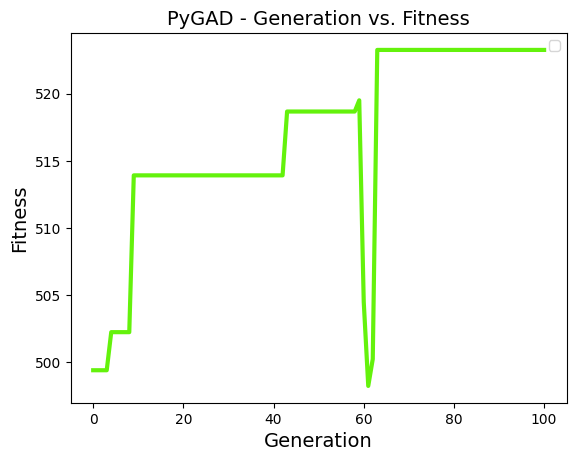

In [45]:
experiment_3_run_1.plot_fitness()
plt.show()

In [46]:
best_solution, best_solution_fitness, best_solution_idx = experiment_3_run_1.best_solution()

In [47]:
evolved_agent = GeneticStrategy(memory_len=4, genotype=best_solution, name='Evolved')

In [48]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 0)
(['010'], 0)
(['011'], 0)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 0)
(['000', '000'], 0)
(['000', '001'], 0)
(['000', '010'], 0)
(['000', '011'], 0)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 0)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 0)
(['001', '100'], 0)
(['001', '101'], 0)
(['001', '110'], 0)
(['001', '111'], 0)
(['010', '000'], 0)
(['010', '001'], 0)
(['010', '010'], 0)
(['010', '011'], 0)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 0)
(['011', '000'], 0)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 0)
(['100', '000'], 0)
(['100', '001'], 0)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 0)
(['101', '000'], 0)
(['101', '001'], 0)
(['101', '010'], 0)
(['101', '011'], 0)
(['

In [49]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'AnotherT42T': 438.29,
 'GradualT4T': 438.9625,
 'Proposer': 439.60333333333335,
 'Defector': 439.84,
 'AverageCopier': 439.9941666666667,
 'Shubik': 441.52,
 'Naive': 441.5941666666667,
 'Evolved': 442.3325,
 'Davis': 442.6141666666667,
 'SoftT42T': 442.67833333333334,
 'ToughT4T': 442.7325,
 'Grofman': 442.85,
 'ToughT42T': 443.6975,
 'SoftT4T': 443.76666666666665,
 'Random': 443.90416666666664,
 'ToughTullock': 444.57666666666665,
 'Stalker': 444.695,
 'Joss': 444.8041666666667,
 'BetterAndBetter': 444.9225,
 'FairT4T': 445.6383333333333,
 'ToughGrudger': 445.74083333333334,
 'SoftTullock': 446.46166666666664,
 'SoftGrudger': 446.56083333333333,
 'DecayingT4T': 451.0925}

#### Run 2

In [50]:
experiment_3_run_2 = deepcopy(experiment_3)

In [51]:
experiment_3_run_2.run()

Generation: 1
Fitness:    514.9166666666666
Generation: 2
Fitness:    514.9166666666666
Generation: 3
Fitness:    514.9166666666666
Generation: 4
Fitness:    514.9166666666666
Generation: 5
Fitness:    514.9166666666666
Generation: 6
Fitness:    514.9166666666666
Generation: 7
Fitness:    514.9166666666666
Generation: 8
Fitness:    514.9166666666666
Generation: 9
Fitness:    514.9166666666666
Generation: 10
Fitness:    514.9166666666666
Generation: 11
Fitness:    514.9166666666666
Generation: 12
Fitness:    514.9166666666666
Generation: 13
Fitness:    514.9166666666666
Generation: 14
Fitness:    514.9166666666666
Generation: 15
Fitness:    514.9166666666666
Generation: 16
Fitness:    514.9166666666666
Generation: 17
Fitness:    514.9166666666666
Generation: 18
Fitness:    514.9166666666666
Generation: 19
Fitness:    514.9166666666666
Generation: 20
Fitness:    514.9166666666666
Generation: 21
Fitness:    514.9166666666666
Generation: 22
Fitness:    514.9166666666666
Generation: 23
Fitn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


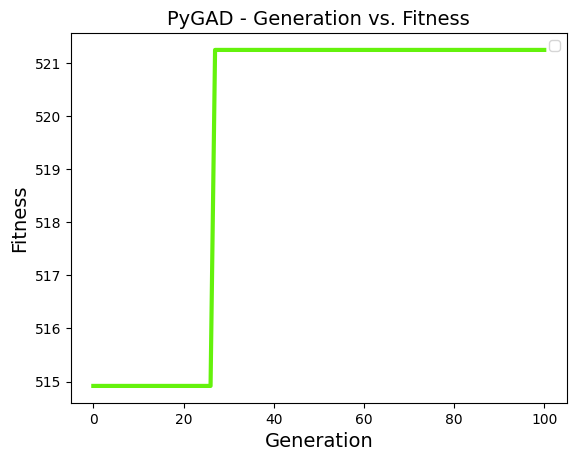

In [52]:
experiment_3_run_2.plot_fitness()
plt.show()

In [53]:
best_solution, best_solution_fitness, best_solution_idx = experiment_3_run_2.best_solution()

In [54]:
evolved_agent = GeneticStrategy(memory_len=4, genotype=best_solution, name='Evolved')

In [55]:
print(str(evolved_agent))

('Start', 0)
(['000'], 0)
(['001'], 0)
(['010'], 0)
(['011'], 0)
(['100'], 0)
(['101'], 0)
(['110'], 0)
(['111'], 0)
(['000', '000'], 0)
(['000', '001'], 0)
(['000', '010'], 0)
(['000', '011'], 0)
(['000', '100'], 0)
(['000', '101'], 0)
(['000', '110'], 1)
(['000', '111'], 0)
(['001', '000'], 0)
(['001', '001'], 0)
(['001', '010'], 0)
(['001', '011'], 0)
(['001', '100'], 0)
(['001', '101'], 0)
(['001', '110'], 0)
(['001', '111'], 0)
(['010', '000'], 0)
(['010', '001'], 1)
(['010', '010'], 0)
(['010', '011'], 0)
(['010', '100'], 0)
(['010', '101'], 0)
(['010', '110'], 0)
(['010', '111'], 0)
(['011', '000'], 0)
(['011', '001'], 0)
(['011', '010'], 0)
(['011', '011'], 0)
(['011', '100'], 0)
(['011', '101'], 0)
(['011', '110'], 0)
(['011', '111'], 0)
(['100', '000'], 0)
(['100', '001'], 0)
(['100', '010'], 0)
(['100', '011'], 0)
(['100', '100'], 0)
(['100', '101'], 0)
(['100', '110'], 0)
(['100', '111'], 1)
(['101', '000'], 0)
(['101', '001'], 1)
(['101', '010'], 0)
(['101', '011'], 0)
(['

In [56]:
run_tournament(environment, [evolved_agent] + representatives, n_runs=100)

{'Evolved': 438.67333333333335,
 'GradualT4T': 439.00083333333333,
 'AverageCopier': 439.05833333333334,
 'Naive': 439.185,
 'FairT4T': 440.265,
 'Stalker': 440.4533333333333,
 'SoftGrudger': 441.375,
 'SoftT42T': 442.3066666666667,
 'ToughGrudger': 442.31916666666666,
 'BetterAndBetter': 442.4841666666667,
 'Defector': 442.585,
 'ToughT42T': 442.59166666666664,
 'Joss': 442.76416666666665,
 'ToughTullock': 442.8441666666667,
 'SoftTullock': 442.9483333333333,
 'ToughT4T': 443.545,
 'Shubik': 444.0975,
 'Davis': 444.17583333333334,
 'SoftT4T': 444.66,
 'Random': 445.095,
 'Grofman': 445.6666666666667,
 'DecayingT4T': 447.2558333333333,
 'Proposer': 447.76916666666665,
 'AnotherT42T': 448.49916666666667}